In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [3]:
df = pd.read_hdf('data-p1/agg_polls_by_day.h5')
df

,pollster,state,population,day,grade,weighted_clinton,weighted_trump,samplesize_total,c-minus-t
0,ABC News/Washington Post,Maryland,lv,2016-09-27,A+,63.0,27.0,706.0,36.0
1,ABC News/Washington Post,Maryland,lv,2016-09-28,A+,63.0,27.0,706.0,36.0
2,ABC News/Washington Post,Maryland,lv,2016-09-29,A+,63.0,27.0,706.0,36.0
3,ABC News/Washington Post,Maryland,lv,2016-09-30,A+,63.0,27.0,706.0,36.0
4,ABC News/Washington Post,Maryland,rv,2016-03-30,A+,63.0,28.0,752.0,35.0
...,...,...,...,...,...,...,...,...,...
20292,icitizen,U.S.,rv,2016-09-15,NaN,42.0,37.0,1000.0,5.0
20293,icitizen,U.S.,rv,2016-09-16,NaN,42.0,37.0,1000.0,5.0
20294,icitizen,U.S.,rv,2016-09-17,NaN,42.0,37.0,1000.0,5.0
20295,icitizen,U.S.,rv,2016-09-18,NaN,42.0,37.0,1000.0,5.0


In [4]:
# Sample weighted_average function
def weighted_average(group, value_column):
    sqrt_sample_sizes = group['samplesize_total'] ** 0.5
    median_sqrt_sample_size = group['samplesize_total'].median() ** 0.5
    weights = sqrt_sample_sizes / median_sqrt_sample_size
    return (group[value_column] * weights).sum() / weights.sum()


# Group by 'day' and apply the weighted average
df_agg = df.groupby(['day','state','population']).apply(lambda group: weighted_average(group, 'c-minus-t'))

# Reset the index to make 'day' a regular column again
df_agg = df_agg.reset_index()

df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c-minus-t'})

# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
            day           state population  c-minus-t
0    2015-11-06   New Hampshire         rv   7.000000
1    2015-11-07   New Hampshire         rv   7.000000
2    2015-11-07  South Carolina          v  -5.000000
3    2015-11-08   New Hampshire         rv   7.000000
4    2015-11-08  South Carolina          v  -5.000000
...         ...             ...        ...        ...
8630 2016-11-07        Virginia         lv   7.854979
8631 2016-11-07      Washington         lv  15.657220
8632 2016-11-07   West Virginia         lv -26.740909
8633 2016-11-07       Wisconsin         lv   5.941443
8634 2016-11-07         Wyoming         lv -31.856953

[8635 rows x 4 columns]


C:\Users\mairi\AppData\Local\Temp\ipykernel_44440\2548401149.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['day','state','population']).apply(lambda group: weighted_average(group, 'c-minus-t'))


In [5]:
#df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c-minus-t'})

# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
            day           state population  c-minus-t
0    2015-11-06   New Hampshire         rv   7.000000
1    2015-11-07   New Hampshire         rv   7.000000
2    2015-11-07  South Carolina          v  -5.000000
3    2015-11-08   New Hampshire         rv   7.000000
4    2015-11-08  South Carolina          v  -5.000000
...         ...             ...        ...        ...
8630 2016-11-07        Virginia         lv   7.854979
8631 2016-11-07      Washington         lv  15.657220
8632 2016-11-07   West Virginia         lv -26.740909
8633 2016-11-07       Wisconsin         lv   5.941443
8634 2016-11-07         Wyoming         lv -31.856953

[8635 rows x 4 columns]


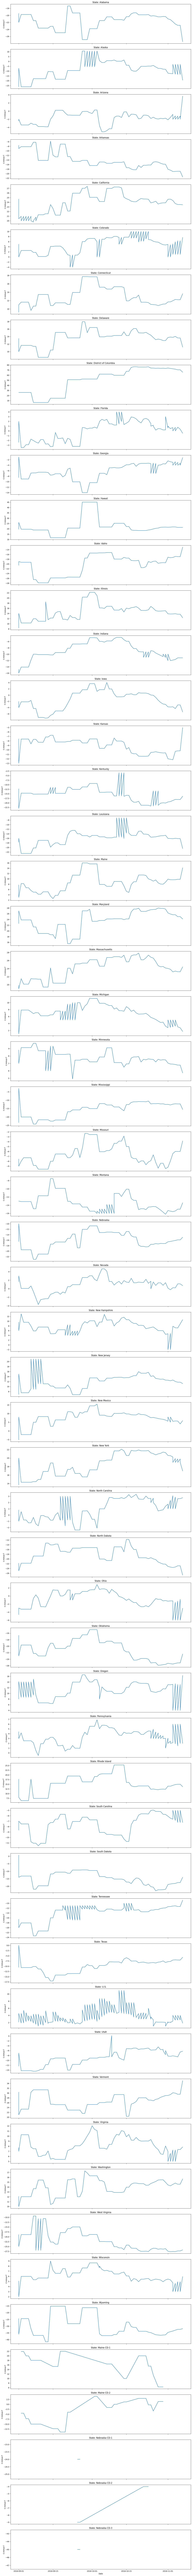

In [11]:
df_agg = df_agg[df_agg['day']>=pd.to_datetime('2016-09-01')] # trying September 1st # offical nominations complete July 26th
states = df_agg['state'].unique()

# Create a subplot for each state
fig, axes = plt.subplots(nrows=len(states), ncols=1, figsize=(15, 200), sharex=True)

# Loop through each state and create a plot
for i, state in enumerate(states):
    state_data = df_agg[df_agg['state'] == state]
    axes[i].plot(state_data['day'], state_data['c-minus-t'], marker=None)
    axes[i].set_title(f'State: {state}')
    axes[i].set_ylabel('C-minus-T')

# Label the x-axis only for the last subplot
axes[-1].set_xlabel('Date')

# Adjust the layout
plt.tight_layout()

# Display the stacked plots
plt.show()

In [27]:
df_agg2 = df.groupby(['day', 'state', 'population']).apply(
    lambda group: pd.Series({
        'weighted_clinton': weighted_average(group, 'weighted_clinton'),
        'weighted_trump': weighted_average(group, 'weighted_trump')
    })
).reset_index()

print("Aggregated DataFrame (df_agg):")
print(df_agg2)


Aggregated DataFrame (df_agg):
            day           state population  weighted_clinton  weighted_trump
0    2015-11-06   New Hampshire         rv         45.000000       38.000000
1    2015-11-07   New Hampshire         rv         45.000000       38.000000
2    2015-11-07  South Carolina          v         42.000000       47.000000
3    2015-11-08   New Hampshire         rv         45.000000       38.000000
4    2015-11-08  South Carolina          v         42.000000       47.000000
...         ...             ...        ...               ...             ...
8630 2016-11-07        Virginia         lv         45.400495       37.545516
8631 2016-11-07      Washington         lv         47.611918       31.954697
8632 2016-11-07   West Virginia         lv         27.701044       54.441953
8633 2016-11-07       Wisconsin         lv         43.676739       37.735296
8634 2016-11-07         Wyoming         lv         22.702532       54.559485

[8635 rows x 5 columns]


C:\Users\mairi\AppData\Local\Temp\ipykernel_31696\604915272.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg2 = df.groupby(['day', 'state', 'population']).apply(


In [54]:
# target2 = df_agg2[(df_agg2['state'] == "U.S.") & (df_agg2['population'] == 'lv')]

# # Plot 'c-minus-t' by day
# plt.figure(figsize=(10, 6))
# # plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
# plt.plot(target2['day'], target2['weighted_clinton'], marker=None, linestyle='-', color='b')
# plt.plot(target2['day'], target2['weighted_trump'], marker=None, linestyle='-', color='r')

# # Add labels and title
# plt.xlabel('Date')
# plt.ylabel('Clinton Minus Trump (Points Difference)')
# plt.title('Clinton Minus Trump (Points Difference) by Day, Aggregated Polls National')
# plt.grid(True)

# # Show the plot
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [6]:
df_agg = df_agg[df_agg['day']>=pd.to_datetime('2016-09-01')]

target = df_agg[(df_agg['state'] == "U.S.") & (df_agg['population'] == 'lv')]

#target['clinton-lead-delta'] = target['c-minus-t'] - target.shift(1)['c-minus-t']

target['MA'] = target['c-minus-t'].rolling(window=7).mean()
#target

C:\Users\mairi\AppData\Local\Temp\ipykernel_44440\3718782954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['MA'] = target['c-minus-t'].rolling(window=7).mean()


In [13]:
target['delta'] = target['c-minus-t'] - target.shift(1)['c-minus-t']

C:\Users\mairi\AppData\Local\Temp\ipykernel_44440\2048594954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['delta'] = target['c-minus-t'] - target.shift(1)['c-minus-t']


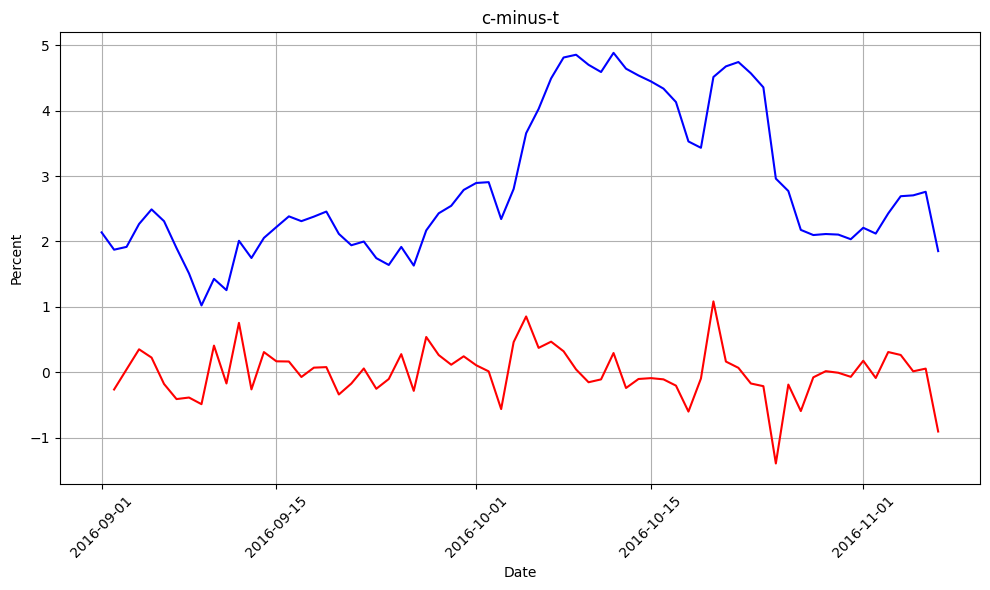

In [14]:
# Plot 'c-minus-t' by day
plt.figure(figsize=(10, 6))
# plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['delta'], marker=None, linestyle='-', color='r')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('c-minus-t')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\mairi\AppData\Local\Temp\ipykernel_44440\249918583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['day_numeric'] = (target['day'] - target['day'].min()).dt.days
C:\Users\mairi\AppData\Local\Temp\ipykernel_44440\249918583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Y_poly_smooth'] = np.polyval(poly_coefficients, target['day_numeric'])


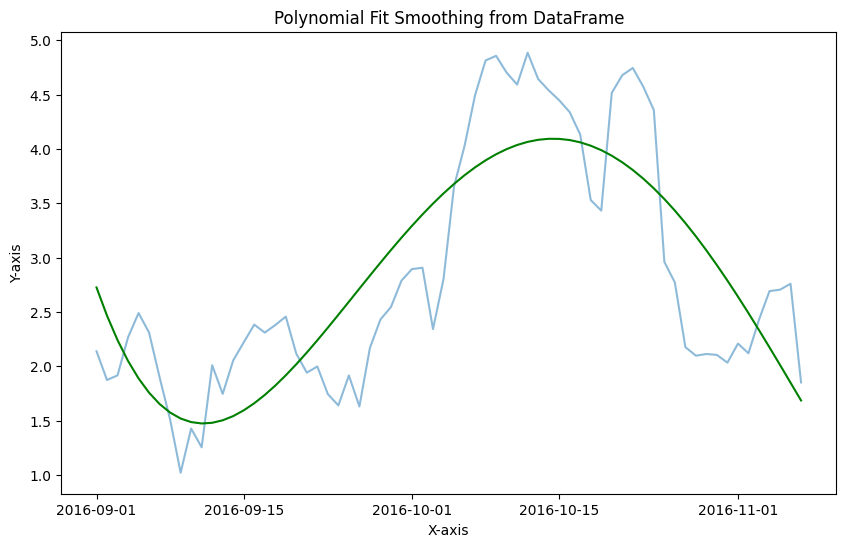

In [9]:

target['day_numeric'] = (target['day'] - target['day'].min()).dt.days 

poly_coefficients = np.polyfit(target['day_numeric'], target['c-minus-t'], deg=4)
target['Y_poly_smooth'] = np.polyval(poly_coefficients, target['day_numeric'])

plt.figure(figsize=(10, 6))


plt.plot(target['day'], target['c-minus-t'], label='Original Data', alpha=0.5)
plt.plot(target['day'], target['Y_poly_smooth'], label='Smoothed Data (Polynomial Fit)', color='green')

#plt.xlim(pd.to_datetime('2016-07-26'), pd.to_datetime('2017-01-01'))

plt.title("Polynomial Fit Smoothing from DataFrame")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()

In [11]:
percentile = target['c-minus-t'].quantile([0.05,0.95])

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton = target[target['c-minus-t'] <= percentile[0.05]]

worst_clinton

,day,state,population,c-minus-t,MA,day_numeric,Y_poly_smooth
5214,2016-09-08,U.S.,lv,1.511101,2.038567,7,1.574998
5271,2016-09-09,U.S.,lv,1.021502,1.916758,8,1.520129
5328,2016-09-10,U.S.,lv,1.427943,1.846856,9,1.487252
5382,2016-09-11,U.S.,lv,1.255269,1.702286,10,1.474681


In [12]:
best_clinton = target[target['c-minus-t'] >= percentile[0.95]]
best_clinton

,day,state,population,c-minus-t,MA,day_numeric,Y_poly_smooth
6893,2016-10-08,U.S.,lv,4.814773,3.578190,37,3.895460
6949,2016-10-09,U.S.,lv,4.856937,3.856706,38,3.951483
7117,2016-10-12,U.S.,lv,4.885660,4.625112,41,4.065458
7675,2016-10-22,U.S.,lv,4.745303,4.196457,51,3.806746


In [16]:
percentile_delta = target['delta'].quantile([0.05,0.95])

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton_delta = target[target['delta'] <= percentile_delta[0.05]]

worst_clinton_delta

,day,state,population,c-minus-t,MA,day_numeric,Y_poly_smooth,delta
7452,2016-10-18,U.S.,lv,3.530096,4.359881,47,4.030285,-0.602843
7851,2016-10-25,U.S.,lv,2.961642,4.180782,54,3.539606,-1.396542
7967,2016-10-27,U.S.,lv,2.176995,3.752136,56,3.318531,-0.594816
8627,2016-11-07,U.S.,lv,1.852323,2.395663,67,1.686401,-0.907821


In [18]:
best_clinton_delta = target[target['delta'] >= percentile_delta[0.95]]
best_clinton_delta

,day,state,population,c-minus-t,MA,day_numeric,Y_poly_smooth,delta
5437,2016-09-12,U.S.,lv,2.010229,1.633639,11,1.480774,0.754961
6283,2016-09-27,U.S.,lv,2.169328,1.863326,26,2.835328,0.538463
6727,2016-10-05,U.S.,lv,3.656097,2.848385,34,3.678439,0.852640
7561,2016-10-20,U.S.,lv,4.516298,4.134174,49,3.938176,1.083265
